In [12]:
import os
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import ndimage
% matplotlib inline

In [13]:
def sigmoid(z):
    s = 1.0/(1+np.exp(-z))
    return s

def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.

    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)

    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias)
    """
    w = np.zeros((dim,1))
    b = 0.0
    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    return w, b

In [14]:
def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat) of size (1, number of examples)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b

    Tips:
    - Write your code step by step for the propagation. np.log(), np.dot()
    """
    m = X.shape[1]
    # FORWARD PROPAGATION (FROM X TO COST)
    A = sigmoid(np.dot(w.T,X)+b)                                    # compute activation
    cost = sum(np.dot(np.log(A),Y.T) + np.dot(np.log(1-A),1-Y.T)) / -m                            # compute cost
    # BACKWARD PROPAGATION (TO FIND GRAD)
    dw = np.dot(X,(A-Y).T)/m
    db = np.sum(A-Y)/m
    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())

    grads = {"dw": dw,
             "db": db}
    return grads, cost

In [15]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost=False):
    """
    This function optimizes w and b by running a gradient descent algorithm

    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps

    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.

    Tips:
    You basically need to write down two steps and iterate through them:
        1) Calculate the cost and the gradient for the current parameters. Use propagate().
        2) Update the parameters using gradient descent rule for w and b.
    """

    costs = []
    for i in range(num_iterations):
        # Cost and gradient calculation
        grads, cost = propagate(w, b, X, Y)

        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]

        # update rule
        w = w - learning_rate *dw
        b = b - learning_rate *db

        # Record the costs
        if i % 100 == 0:
            costs.append(cost)

        # Print the cost every 100 training examples
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    params = {"w": w,
              "b": b}

    grads = {"dw": dw,
             "db": db}
    return params, grads, costs

In [16]:
def predict(w, b, X):
    """
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)

    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)

    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    """
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)

    # Compute vector "A" predicting the probabilities of a cat being present in the picture
    A = sigmoid(np.dot(w.T,X)+b)
    for i in range(A.shape[1]):
        # Convert probabilities A[0,i] to actual predictions p[0,i]
        Y_prediction[0,i]=A[0,i]
#         if A[0,i] <= 0.5:
#             Y_prediction[0,i] = 0
#         else:
#             Y_prediction[0,i] = 1
    assert(Y_prediction.shape == (1, m))
    return Y_prediction

In [17]:
def model(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.5, print_cost=False):
    """
    Builds the logistic regression model by calling the function you've implemented previously

    Arguments:
    X_train -- training set represented by a numpy array of shape (num_px * num_px * 3, m_train)
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array of shape (num_px * num_px * 3, m_test)
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations

    Returns:
    d -- dictionary containing information about the model.
    """
    dim = X_train.shape[0]
    # initialize parameters with zeros
    w, b = initialize_with_zeros(dim)

    # Gradient descent
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)

    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]

    # Predict test/train set examples
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test,
         "Y_prediction_train" : Y_prediction_train,
         "w" : w,
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}

    return d

In [18]:
import pandas as pd
#TRAINING_METAPATH = "D:/dataset/paddle/store/training.json"
VALIDATION_METAPATH = "D:/dataset/paddle/store/validation.json"
TESTING_METAPATH = "D:/dataset/paddle/store/testing.json"

#train_info = pd.read_json(TRAINING_METAPATH)
valid_info = pd.read_json(VALIDATION_METAPATH)
test_info = pd.read_json(TESTING_METAPATH)

In [19]:
DATA_DIR = "D:/dataset/paddle/valid/"
def generater_dataset(file_name):
    file_name_path = os.path.join(DATA_DIR,str(file_name)+".pkl")
    X = np.load(file_name_path)
    X = np.array(X)
    
    ## get Y label
    valid_new_list = []
    for valid_list in valid_database[file_name]["annotations"]:
        valid_new_list = valid_new_list + valid_list['segment']
    # 转换为 整数
    valid_new_list = np.array(valid_new_list,dtype="int")
    
    label = np.zeros((X.shape[0],1),dtype=np.int8)
    for i in range(len(valid_new_list)/2):
        label[valid_new_list[2*i]:valid_new_list[2*i+1]] =1
    return X,label

In [20]:
#train_database = train_info["database"]
valid_database = valid_info["database"]
test_database = test_info["database"]

a = valid_database.keys()
x_train,y_train = generater_dataset(a[0])
x_test,y_test = generater_dataset(a[100])
x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T

In [21]:
x_train.shape,y_train.shape

((2048L, 4861L), (1L, 4861L))

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.631667
Cost after iteration 200: 0.608194
Cost after iteration 300: 0.592722
Cost after iteration 400: 0.581374
Cost after iteration 500: 0.572517
Cost after iteration 600: 0.565292
Cost after iteration 700: 0.559199
Cost after iteration 800: 0.553929
Cost after iteration 900: 0.549280
Cost after iteration 1000: 0.545116
Cost after iteration 1100: 0.541339
Cost after iteration 1200: 0.537880
Cost after iteration 1300: 0.534686
Cost after iteration 1400: 0.531718
Cost after iteration 1500: 0.528944
Cost after iteration 1600: 0.526340
Cost after iteration 1700: 0.523884
Cost after iteration 1800: 0.521560
Cost after iteration 1900: 0.519355
train accuracy: 63.2063293521 %
test accuracy: 26.7761855332 %


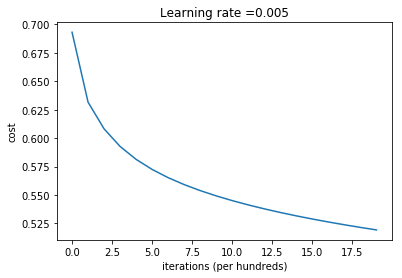

In [22]:

d = model(x_train, y_train, x_test, y_test,
          num_iterations=2000, learning_rate=0.005, print_cost=True)
#print(train_set_x.shape,train_set_y.shape)
# Plot learning curve (with costs)
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

In [ ]:
# learning_rates = [0.01, 0.001, 0.0001]
# models = {}
# for i in learning_rates:
#     print ("learning rate is: " + str(i))
#     models[str(i)] = model(x_train, y_train, x_test, y_test,
#                            num_iterations=1500, learning_rate=i,print_cost=False)
#     print ('\n' + "-------------------------------------------------------" + '\n')
# for i in learning_rates:
#     plt.plot(np.squeeze(models[str(i)]["costs"]), label= str(models[str(i)]["learning_rate"]))

# plt.ylabel('cost')
# plt.xlabel('iterations')

# legend = plt.legend(loc='upper center', shadow=True)
# frame = legend.get_frame()
# frame.set_facecolor('0.90')
# plt.show()

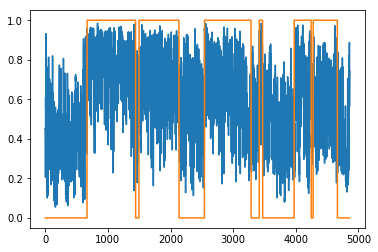

In [23]:
y_train_pre = d["Y_prediction_train"].T
plt.plot(y_train_pre)
y_train_plt = y_train.T
plt.plot(y_train_plt)

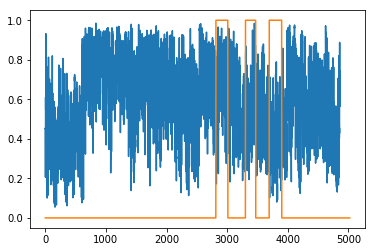

In [24]:
y_test_pre = d["Y_prediction_train"].T
plt.plot(y_test_pre)
y_test_plt = y_test.T
plt.plot(y_test_plt)

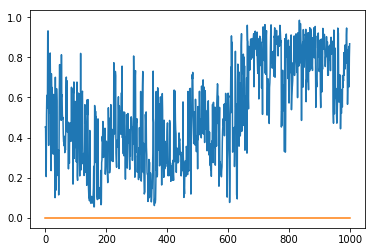

In [25]:
plt.plot(y_test_pre[:1000])
plt.plot(y_test_plt[:1000])